In [1]:
from sklearn.decomposition import FactorAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadBeer,loadWine,runNNs


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train, X_test, y_train, y_test= loadBeer()
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
..\Util.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)


,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,StyleID
BeerID,,,,,,,,,,
17868,1.056,1.014,5.50,36.33,3.86,26.50,90,70.0,1,78
53672,1.063,1.016,6.13,5.00,37.86,28.39,60,35.0,1,9
56239,1.051,1.010,5.39,47.50,6.42,30.00,60,68.0,1,10
5891,1.063,1.018,6.00,84.60,12.69,10.60,60,70.0,1,10
9124,1.069,1.014,7.19,50.26,50.00,28.39,60,70.0,1,19


In [3]:
transformer = FactorAnalysis(n_components=3)
faComponents = transformer.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])
faDf = pd.DataFrame(data = faComponents
             , columns = ['FA component 1', 'FA component 2','FA component 3'])
finalDf = pd.concat([faDf, y_train], axis = 1)
finalDf.head()

,FA component 1,FA component 2,FA component 3,Style
0,-0.119444,0.312776,-0.164722,NaN
1,-0.108950,-0.865068,-1.584594,Cream Ale
2,-0.101130,-0.887418,-0.032037,Holiday/Winter Special Spiced Beer
3,-0.200042,-0.922864,1.319161,American IPA
4,-0.109419,-0.732293,0.108797,NaN


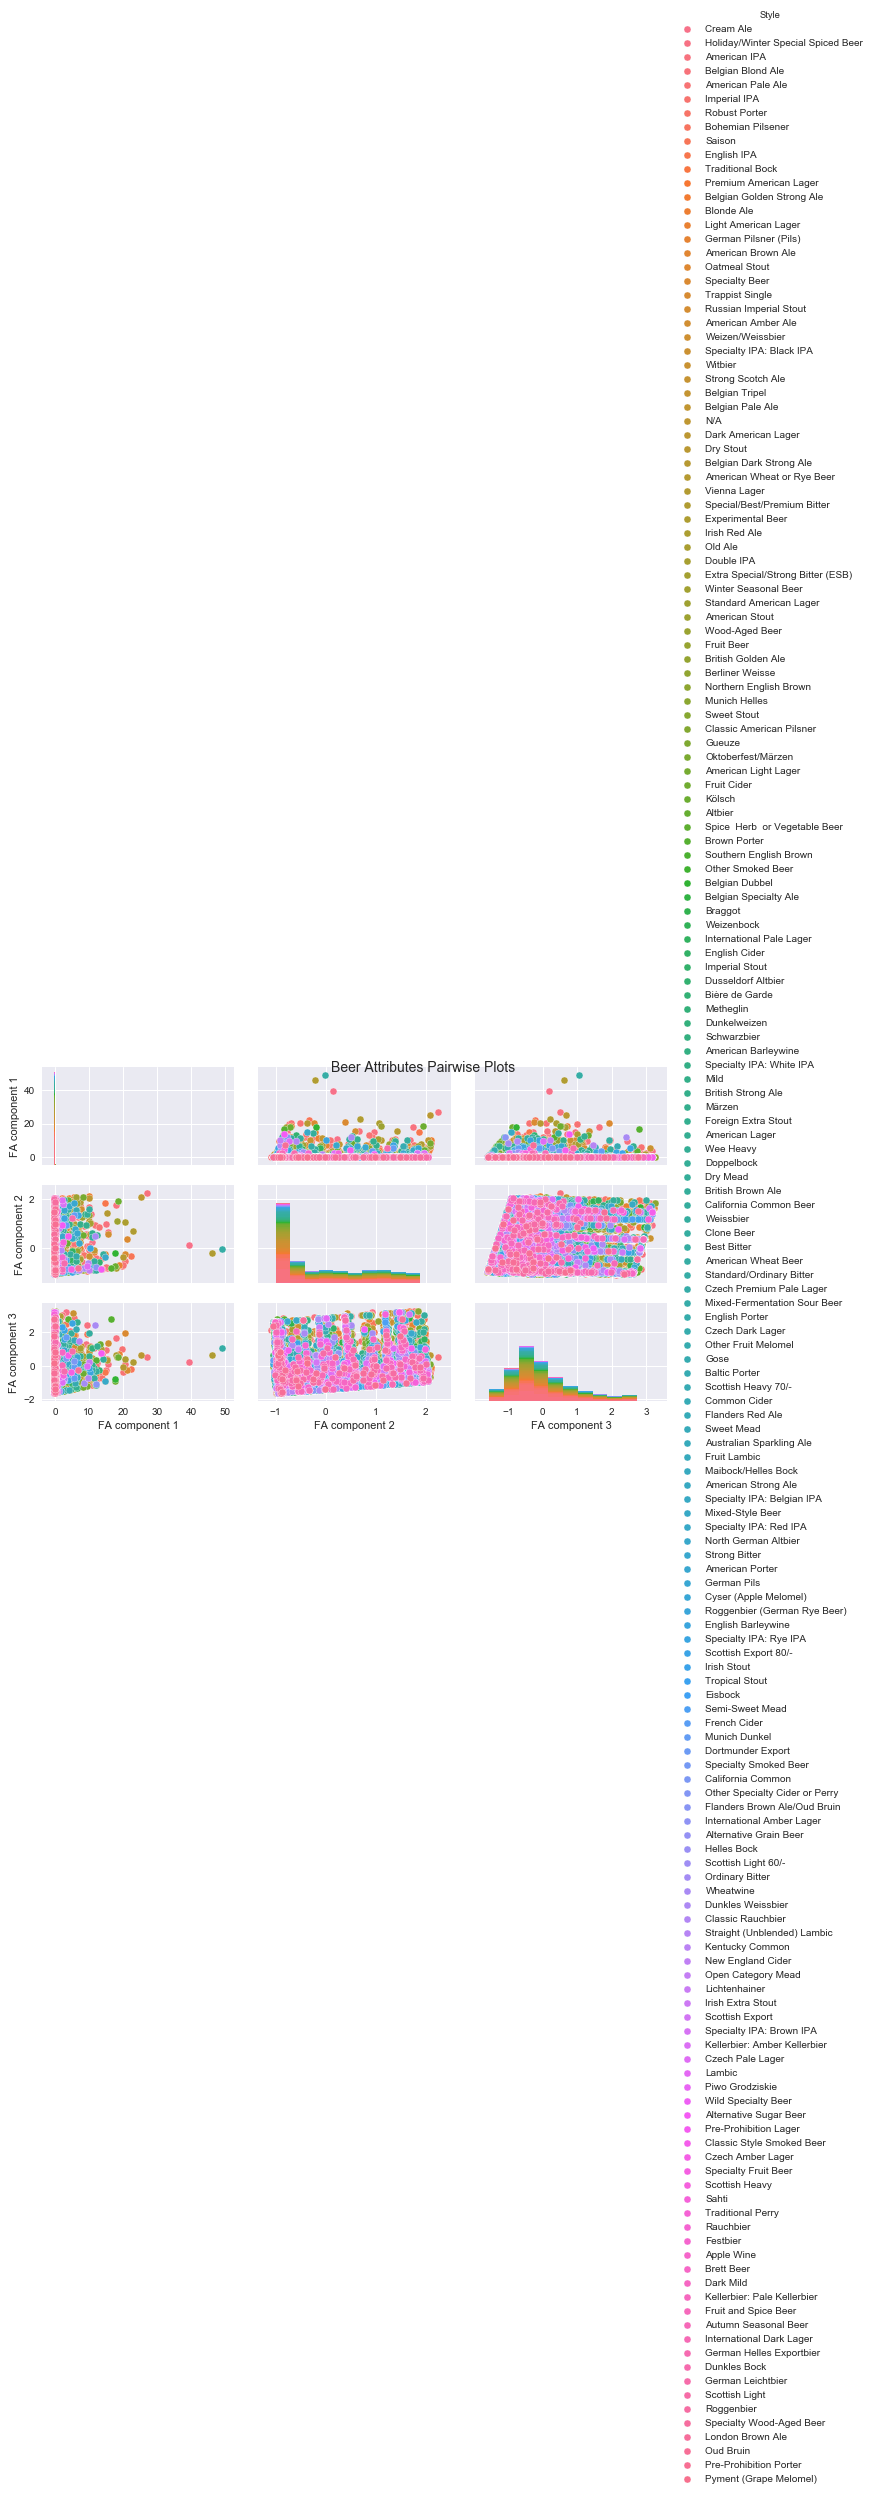

In [4]:
pp = sns.pairplot(finalDf, hue='Style', size=1.8, aspect=1.8)
fig = pp.fig 
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


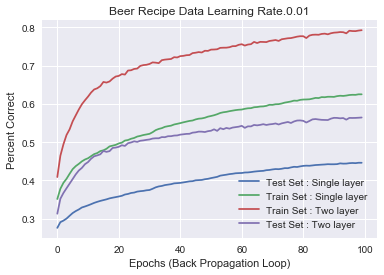

In [5]:
X_train, X_test, y_train, y_test= loadBeerRaw()
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
X_train=X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
X_test['SugarScale'] = encoder.fit_transform(X_test['SugarScale']).astype(np.int32)
X_test=X_test[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
transformer = FactorAnalysis(n_components=3)

faComponents =transformer.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])
X_train = pd.DataFrame(data = faComponents,index=X_train.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])
faComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = faComponents,index=X_test.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])

y_test =encoder.fit_transform(y_test).astype(np.int32)
y_train=encoder.fit_transform(y_train).astype(np.int32)
num_features = X_train.shape[1]
num_classes = len(encoder.classes_)

learningRates=[.01]
for i in learningRates:
    runNNs(X_train, X_test, y_train, y_test,num_classes,num_features,"Beer Recipe Data Learning Rate.",100,i)

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


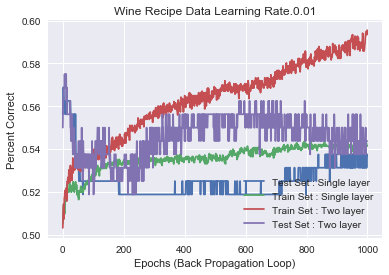

In [8]:
X_train, X_test, y_train, y_test= loadWine()
transformer = FactorAnalysis(n_components=3)

faComponents =transformer.fit_transform(X_train)
X_train = pd.DataFrame(data = faComponents,index=X_train.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])
faComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = faComponents,index=X_test.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])

num_features = X_train.shape[1]
num_classes = 10

learningRates=[.01]
for i in learningRates:
    runNNs(X_train, X_test, y_train, y_test,num_classes,num_features,"Wine Recipe Data Learning Rate.",1000,i)